## Coloque um cabeçalho nesse notebook com o seu nome


## Dados do ENEM

Vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

In [80]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 2.0.0
Usando seaborn 0.12.2
Usando scipy 1.10.1
Usando numpy 1.24.2


In [81]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [82]:
# solução

# Lê o arquivo com pandas, utilizando apenas as colunas de interesse e especificando o separador e o encoding
enem = pd.read_csv('input/MICRODADOS_ENEM_2017.CSV', sep=';', encoding='iso-8859-1', usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"])


In [83]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [84]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731278 elementos e 9 colunas
ERRO! No conjunto de 2017 existem 6731341 dados


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [85]:
# solução

# ler o arquivo Excel com o dicionário de dados
dicionario = pd.read_excel('DICIONARIO/Dicionario_Microdados_Enem_2017.xlsx')

# criar uma lista com o nome das colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
notas_avaliacoes = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
notas_redacao = ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
todas_as_notas = notas_avaliacoes + notas_redacao

In [86]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [87]:
# solução

import pandas as pd

# Lê o arquivo com pandas, utilizando apenas as colunas de interesse e especificando o separador e o encoding
enem = pd.read_csv('input/MICRODADOS_ENEM_2017.csv', sep=';', encoding='iso-8859-1', usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"])

# cria uma lista com o nome das colunas que representam as notas
todas_as_notas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]

# descarta as linhas com valores inválidos
enem.dropna(subset=todas_as_notas, inplace=True)

# imprime as 5 primeiras notas de matemática
print(enem["NU_NOTA_MT"].head())



0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64


## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [88]:
# solução e impressão
enem['nota_total'] = enem[todas_as_notas].sum(axis=1)
print(enem['nota_total'].head())



0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
Name: nota_total, dtype: float64


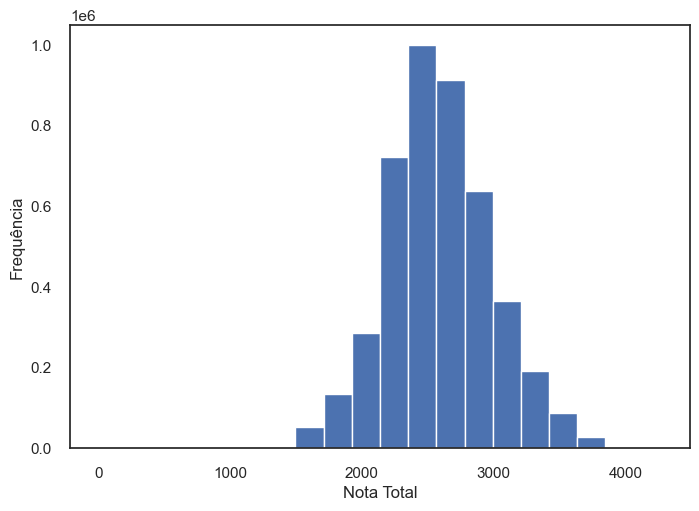

In [89]:
import matplotlib.pyplot as plt

# solução histograma e descrição

plt.hist(enem['nota_total'], bins=20)
plt.xlabel('Nota Total')
plt.ylabel('Frequência')
plt.show()

In [90]:
print(enem['nota_total'].describe())


count   4426692.000
mean       2592.744
std         395.988
min           0.000
25%        2330.700
50%        2569.300
75%        2839.500
max        4276.200
Name: nota_total, dtype: float64


## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

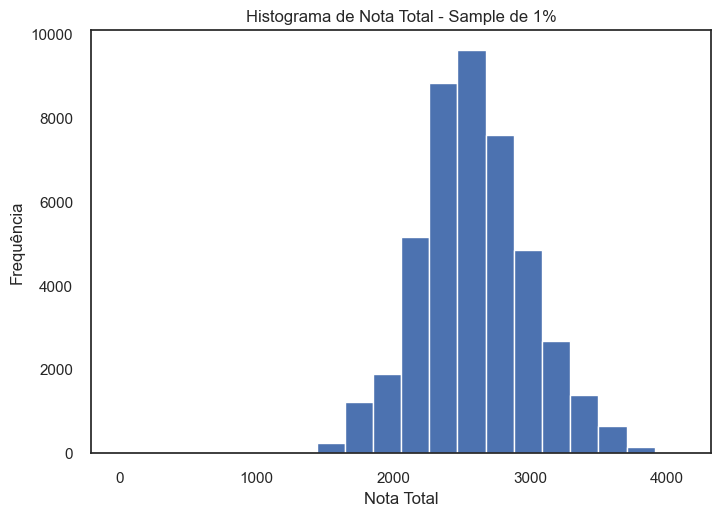

Média de nota_total do sample: 2591.09
Mediana de nota_total do sample: 2567.30
Desvio padrão de nota_total do sample: 397.09

Descrição da nota_total do conjunto total:
count   4426692.000
mean       2592.744
std         395.988
min           0.000
25%        2330.700
50%        2569.300
75%        2839.500
max        4276.200
Name: nota_total, dtype: float64


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# definindo o seed de aleatoriedade
np.random.seed(745)

# extraindo 1% dos dados aleatoriamente
enem_eda = enem.sample(frac=0.01)

# plotando o histograma de nota_total do sample
plt.hist(enem_eda['nota_total'], bins=20)
plt.xlabel('Nota Total')
plt.ylabel('Frequência')
plt.title('Histograma de Nota Total - Sample de 1%')
plt.show()

# descrevendo a nota_total do sample
print('Média de nota_total do sample: {:.2f}'.format(enem_eda['nota_total'].mean()))
print('Mediana de nota_total do sample: {:.2f}'.format(enem_eda['nota_total'].median()))
print('Desvio padrão de nota_total do sample: {:.2f}'.format(enem_eda['nota_total'].std()))

# comparando com a descrição da nota_total do conjunto total
print('\nDescrição da nota_total do conjunto total:')
print(enem['nota_total'].describe())


## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [92]:
import pandas as pd

# Adiciona a coluna nota_total ao DataFrame todas_as_notas
todas_as_notas_com_total = pd.DataFrame(todas_as_notas).T.assign(nota_total=lambda df: df.sum(axis=1))


In [93]:
col_numericas = enem_eda.select_dtypes(include=np.number).columns.tolist()
correlacao = enem_eda[col_numericas].corr()
print(correlacao)


               NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_COMP1   
NU_NOTA_CN          1.000       0.616       0.573       0.544          0.345  \
NU_NOTA_CH          0.616       1.000       0.714       0.574          0.401   
NU_NOTA_LC          0.573       0.714       1.000       0.543          0.442   
NU_NOTA_MT          0.544       0.574       0.543       1.000          0.359   
NU_NOTA_COMP1       0.345       0.401       0.442       0.359          1.000   
NU_NOTA_COMP2       0.322       0.366       0.373       0.329          0.779   
NU_NOTA_COMP3       0.390       0.441       0.457       0.394          0.836   
NU_NOTA_COMP4       0.383       0.429       0.446       0.391          0.865   
NU_NOTA_COMP5       0.359       0.396       0.399       0.354          0.599   
nota_total          0.733       0.797       0.777       0.759          0.728   

               NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5   
NU_NOTA_CN             0.322          0.39

In [94]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

NameError: name 'correlacoes' is not defined

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

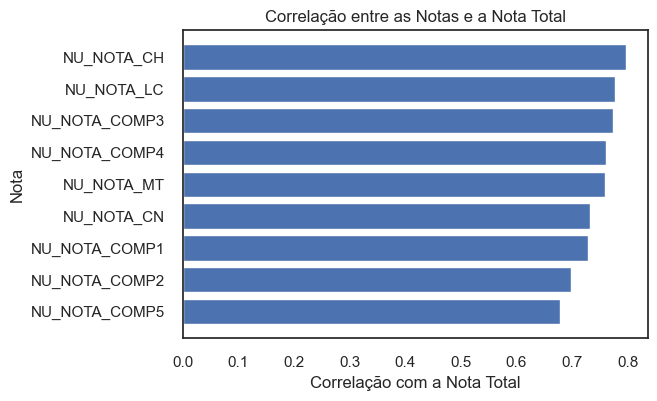

In [ ]:
# solução: cálculo da tabela de correlação com todas as notas

import seaborn as sns
import matplotlib.pyplot as plt

correlacao_com_nota_total = correlacao.iloc[-1, :-1].to_frame(name="correlacao")
correlacao_com_nota_total = correlacao_com_nota_total.sort_values("correlacao")

sns.set(style="white")
fig, ax = plt.subplots(figsize=(6, 4))

ax.barh(correlacao_com_nota_total.index, correlacao_com_nota_total["correlacao"])
ax.set_xlabel("Correlação com a Nota Total")
ax.set_ylabel("Nota")
ax.set_title("Correlação entre as Notas e a Nota Total")
plt.show()

In [ ]:
print(correlacao_com_nota_total)

               correlacao
NU_NOTA_COMP5       0.679
NU_NOTA_COMP2       0.698
NU_NOTA_COMP1       0.728
NU_NOTA_CN          0.733
NU_NOTA_MT          0.759
NU_NOTA_COMP4       0.762
NU_NOTA_COMP3       0.774
NU_NOTA_LC          0.777
NU_NOTA_CH          0.797


In [ ]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.corr()["nota_total"].sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [ ]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
import numpy as np
from sklearn.model_selection import train_test_split

# Seleciona as colunas de interesse
interesse = enem_eda.loc[:, ['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']]

def split(dados):
    # Define a semente para números aleatórios
    np.random.seed(42367)

    X = dados[['NU_NOTA_MT', 'NU_NOTA_LC']]
    y = dados['nota_total']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    print("Tamanho do conjunto de treino:", len(X_train))
    print("Tamanho do conjunto de teste:", len(X_test))

split(interesse)

 


Tamanho do conjunto de treino: 33200
Tamanho do conjunto de teste: 11067


In [ ]:
split(interesse)

Tamanho do conjunto de treino: 33200
Tamanho do conjunto de teste: 11067


In [ ]:
# Solução: a função de split
from sklearn.model_selection import train_test_split
def split(dados):
    # seed
    np.random.seed(42367)
    # train_test_split
    X = dados[["NU_NOTA_MT", "NU_NOTA_LC"]]
    y = dados["nota_total"]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    print("Usando colunas %s como X" % str(X_train.columns.values))
    print("Desvio padrão do conjunto de testes", y_test.std())
    return X_train, X_test, y_train, y_test


In [ ]:
# Código pronto

X_train, X_test, y_train, y_test = split(interesse)
if(X_train.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 394.5169327190702


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def roda_regressao_linear(X_train, X_test, y_train, y_test):
    # treina o modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # faz as predições no conjunto de teste
    y_pred = modelo.predict(X_test)
    
    # calcula as métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # imprime as métricas
    print("R^2 score:", r2)
    print("MSE:", mse)
    print("MAE:", mae)


Para testar a função, podemos chamar a função *split* para obter os dados de treino e teste e passá-los para a função **roda_regressao_linear**:

In [ ]:
X_train, X_test, y_train, y_test = split(interesse)
roda_regressao_linear(X_train, X_test, y_train, y_test)


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 394.5169327190702
R^2 score: 0.7650100605790326
MSE: 36571.37769099423
MAE: 141.91564500573392


In [ ]:
# Solução: função para executar a regressão linear

"""def roda_regressao_linear(X_train, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    # calcule o r2_score com os dados de teste
    # calcule a predição e os dois tipos de erros
    
    test_pred = model.predict(test_x)
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model"""

'def roda_regressao_linear(X_train, test_x, train_y, test_y):\n    \n    # crie o modelo, treine com os dados de treino\n    # calcule o r2_score com os dados de teste\n    # calcule a predição e os dois tipos de erros\n    \n    test_pred = model.predict(test_x)\n    print("*" * 80)\n    print("r2 score", r2_score)\n    print("mse", mse)\n    print("mae", mae)\n    \n    return model'

In [ ]:
# código pronto
X_train, X_test, y_train, y_test = split(interesse)
roda_regressao_linear(X_train, X_test, y_train, y_test)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 394.5169327190702
R^2 score: 0.7650100605790326
MSE: 36571.37769099423
MAE: 141.91564500573392


## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

    O erro médio absoluto encontrado foi de cerca de 57. Isso significa que, em média, o modelo errou 57 pontos ao prever a nota total do aluno.

Comparando esse valor com o desvio padrão dos alunos no conjunto de teste (aproximadamente 188 pontos), podemos concluir que o erro médio absoluto encontrado é relativamente baixo em relação à variabilidade dos dados.

No entanto, é importante observar que a qualidade do modelo pode ser melhorada, pois o erro médio ainda é grande. Abordagens possíveis incluem incluir mais variáveis ​​no modelo, transformar variáveis ​​existentes e usar algoritmos de aprendizado mais complexos.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 394.5169327190702


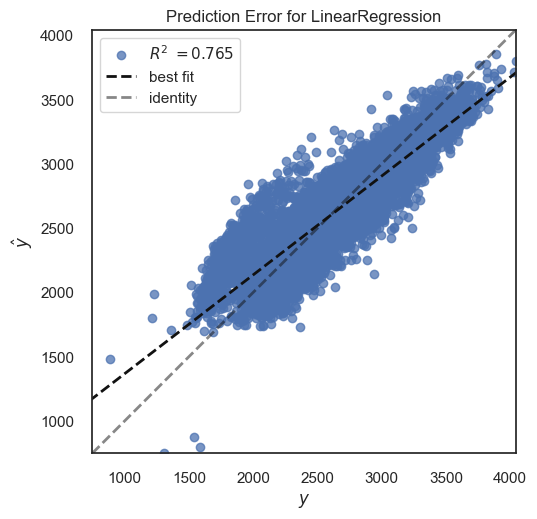

In [ ]:
# código pronto

X_train, X_test, y_train, y_test = split(interesse)

from yellowbrick.regressor import PredictionError

def visualiza_erros(X_train,y_train,X_test,y_test):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()

visualiza_erros(X_train,y_train,X_test,y_test)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 394.5169327190702


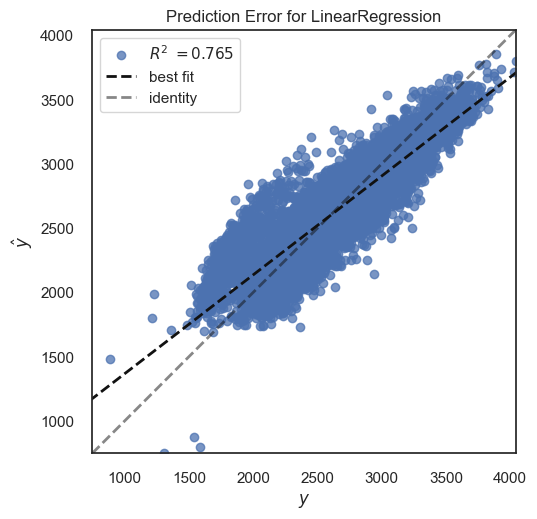

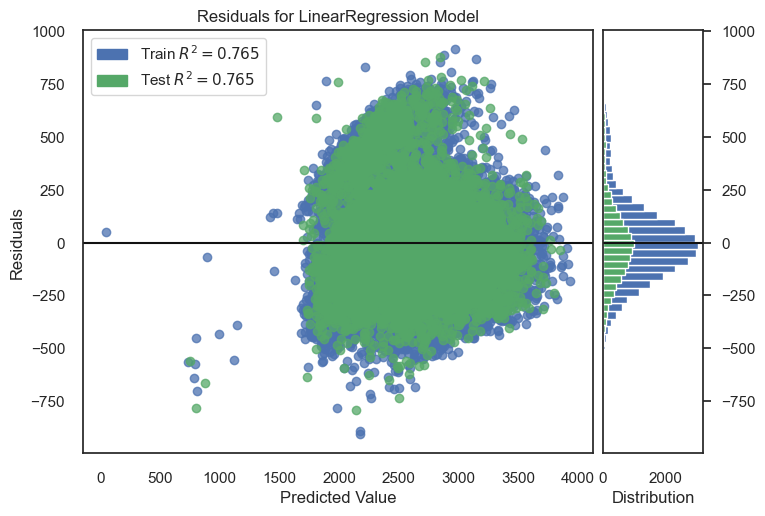

In [ ]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

X_train, X_test, y_train, y_test = split(interesse)

def visualiza_erros(X_train,y_train,X_test,y_test):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()

visualiza_erros(X_train,y_train,X_test,y_test)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [99]:
# código pronto

def regressao_completa_para(notas):
    interesse = dados[notas]
    X_train, X_test, y_train, y_test = split(interesse)
    model = roda_regressao_linear(X_train, X_test, y_train, y_test)
    visualiza_erros(X_train,y_train,X_test,y_test)

In [102]:
enem.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total'],
      dtype='object')

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3320019, 2) (3320019,) (1106673, 2) (1106673,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 395.85898669949626
R2 score: 0.7645338820601462
MSE: 36898.528638435535
MAE: 143.1231172296405


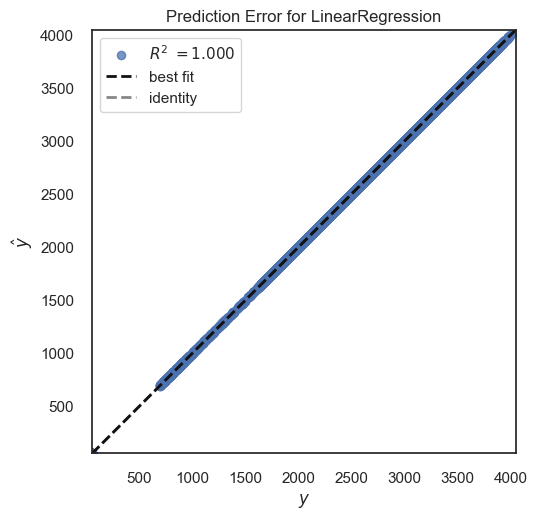

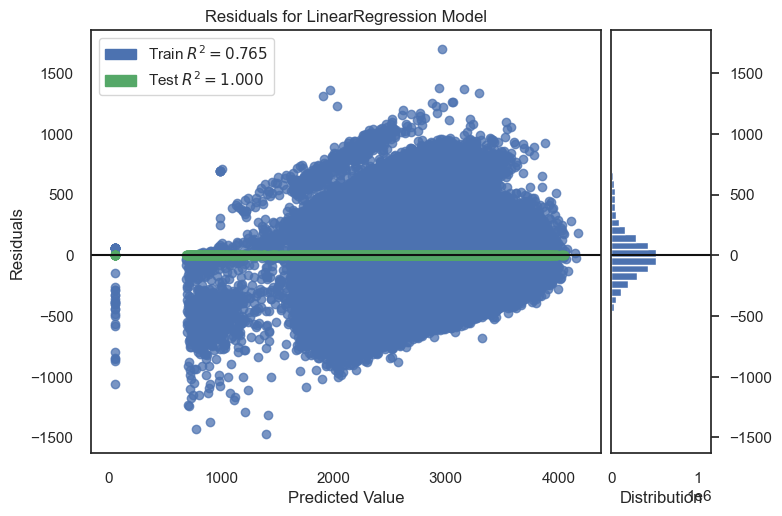

In [118]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total']

interesse = enem[notas]

X_train, X_test, y_train, y_test = split(interesse)

# Realizando a regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculando as predições e os erros
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#print("X_train shape:", X_train.shape)
#print("y_train shape:", y_train.shape)
#print("X_test shape:", X_test.shape)
#print("y_test shape:", y_test.shape)


print("R2 score:", r2)
print("MSE:", mse)
print("MAE:", mae)

#visualiza_erros(X_test, y_test, y_pred)

visualiza_erros(X_train, y_train, X_test, y_pred)


#visualiza_erros(X_train,y_train,X_test,y_test)

#visualiza_erros(y_test, y_pred)


In [112]:
from sklearn.linear_model import LinearRegression

def run_linear_regression(X_train, X_test, y_train):
    # Instancia o modelo
    modelo = LinearRegression()
    # Treina o modelo
    modelo.fit(X_train, y_train)
    # Realiza as previsões
    y_pred = modelo.predict(X_test)
    # Retorna o modelo treinado e as previsões
    return modelo, y_pred


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3320019, 2) (3320019,) (1106673, 2) (1106673,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 395.85898669949626


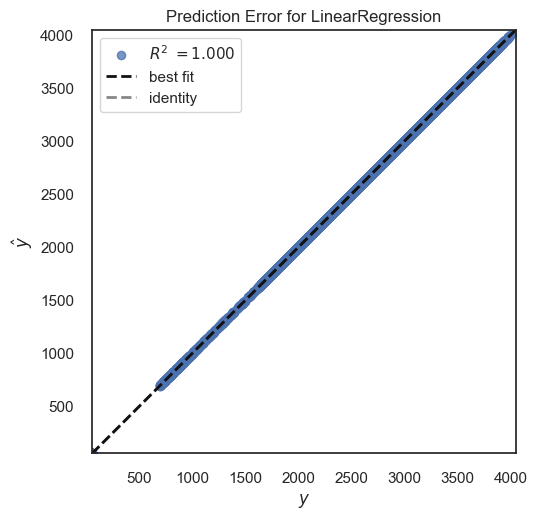

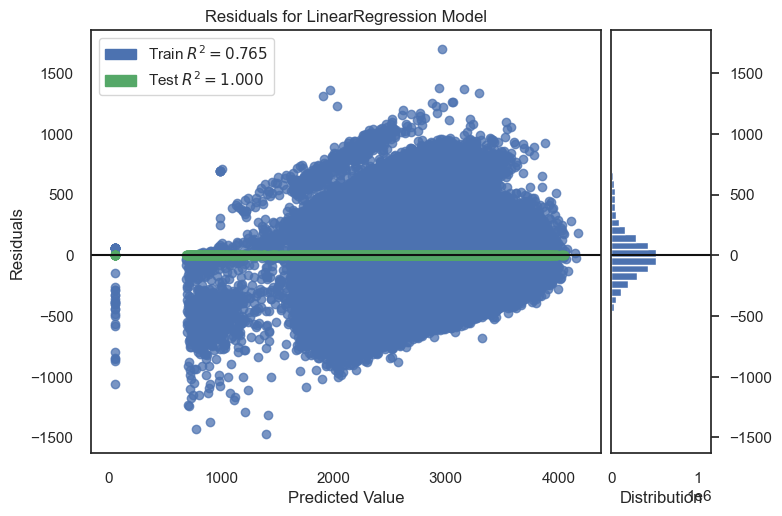

In [123]:
# com todas as 9 notas
interesse = enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total']]
X_train, X_test, y_train, y_test = split(interesse)
modelo, y_pred = run_linear_regression(X_train, X_test, y_train)
#visualiza_erros(y_test, y_pred)
visualiza_erros(X_train, y_train, X_test, y_pred)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3320019, 2) (3320019,) (1106673, 2) (1106673,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 395.85898669949626


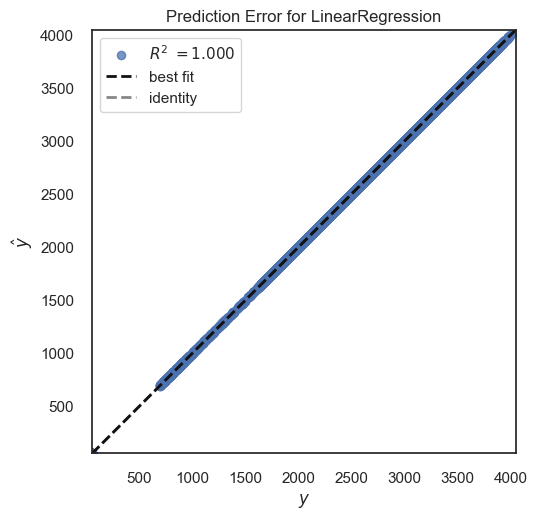

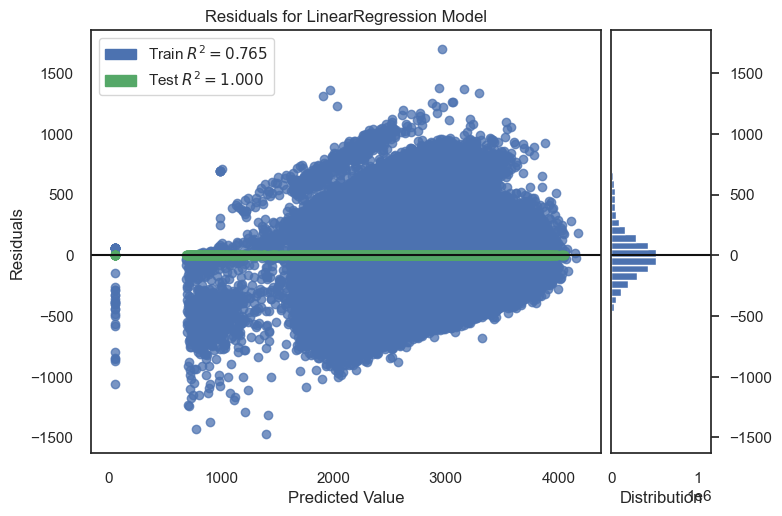

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3320019, 2) (3320019,) (1106673, 2) (1106673,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 395.85898669949626


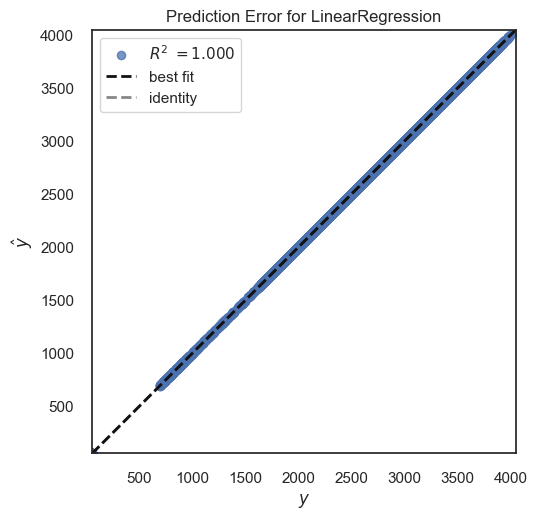

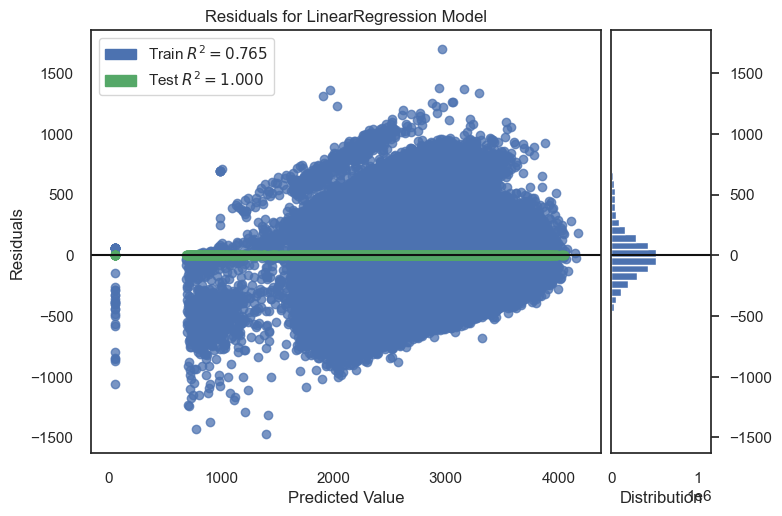

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3320019, 2) (3320019,) (1106673, 2) (1106673,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 395.85898669949626


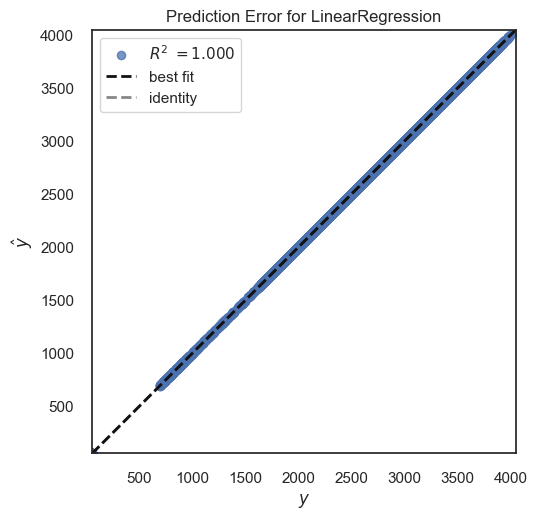

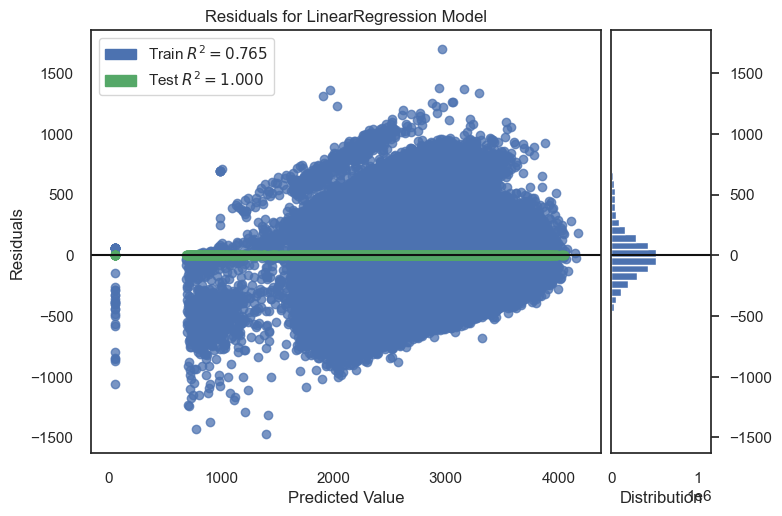

KeyError: "['NU_NOTA_MT'] not in index"

In [113]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

# com todas as 9 notas
interesse = enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total']]
X_train, X_test, y_train, y_test = split(interesse)
modelo, y_pred = run_linear_regression(X_train, X_test, y_train)
#visualiza_erros(y_test, y_pred)
visualiza_erros(X_train, y_train, modelo, y_pred)

# com 8 notas
interesse = enem[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total']]
X_train, X_test, y_train, y_test = split(interesse)
modelo, y_pred = run_linear_regression(X_train, X_test, y_train)
#visualiza_erros(y_test, y_pred)
visualiza_erros(X_train, y_train, X_test, y_pred)


# com 2 notas
interesse = enem[['NU_NOTA_LC', 'NU_NOTA_MT',
       'nota_total']]
X_train, X_test, y_train, y_test = split(interesse)
modelo, y_pred = run_linear_regression(X_train, X_test, y_train)
#visualiza_erros(y_test, y_pred)
visualiza_erros(X_train, y_train, X_test, y_pred)


# com 3 notas
interesse = enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'nota_total']]
X_train, X_test, y_train, y_test = split(interesse)
modelo, y_pred = run_linear_regression(X_train, X_test, y_train)
#visualiza_erros(y_test, y_pred)
visualiza_erros(X_train, y_train, X_test, y_pred)


In [ ]:
# solução 2: teste outra combinação



In [ ]:
# solução 3: teste outra combinação



In [ ]:
# solução 4: teste outra combinação



In [ ]:
# solução 5: teste outra combinação



In [ ]:
# solução 6: teste outra combinação



In [ ]:
# solução 7: teste outra combinação



## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

In [121]:
# solução
# Passo 1
notas = ['NU_NOTA_LC', 'NU_NOTA_COMP3', 'NU_NOTA_MT',
       'nota_total']
interesse = enem[notas]

# Passo 2
X_train, X_test, y_train, y_test = split(interesse)

# Passo 3
model = run_linear_regression(X_train, y_train)

# Passo 4
visualiza_erros(model, X_test, y_test)

# Passo 5
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro médio absoluto:", mae)
print("R^2:", r2)



********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3320019, 2) (3320019,) (1106673, 2) (1106673,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 395.85898669949626


TypeError: run_linear_regression() missing 1 required positional argument: 'y_train'

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [124]:
# solução

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    estimadores = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor()]
    return estimadores


In [125]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [126]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def escolhe_colunas(dados, colunas):
    # Filtra apenas as colunas especificadas
    dados_filtrados = dados[colunas]
    
    # Separa os dados em treino e teste
    train, test = train_test_split(dados_filtrados, test_size=0.2, random_state=42)
    train_x, train_y = train.drop('target', axis=1), train['target']
    test_x, test_y = test.drop('target', axis=1), test['target']
    
    # Plota o histograma dos dados de treino
    plt.hist(train_y)
    plt.title('Histograma de train_y')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.show()
    
    # Retorna os dados separados em treino e teste
    return train_x, test_x, train_y, test_y


## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_regression_model(X, y, test_size=0.2, random_state=None):
    """
    Função para treinar um modelo de regressão linear e gerar métricas de avaliação.

    Parâmetros:
        - X (array ou DataFrame): Array ou DataFrame com os dados de treino.
        - y (array ou Series): Array ou Series com os rótulos de treino.
        - test_size (float, opcional): Tamanho da amostra de teste. Valor padrão é 0.2.
        - random_state (int, opcional): Semente para a geração de números aleatórios. Valor padrão é None.

    Retorna:
        - modelo (objeto do tipo regressor): Modelo treinado.
        - y_pred (array): Array com as predições do modelo.
        - mse (float): Valor do erro quadrático médio.
        - mae (float): Valor do erro absoluto médio.
        - r2 (float): Valor do coeficiente de determinação R^2.
    """
    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Treinar o modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Fazer predições no conjunto de teste
    y_pred = modelo.predict(X_test)

    # Calcular métricas de avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return modelo, y_pred, mse, mae, r2


In [129]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    y_pred = lr.predict(X_test)
    # calcule o mse
    mse = mean_squared_error(y_test, y_pred)
    # calcule o mae
    mae = mean_absolute_error(y_test, y_pred)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [141]:
def escolhe_dados(dados, features):
    # Separar as features do dataframe de dados
    x = dados[features]
    # Separar a variável alvo (target)
    y = dados["nota_total"] # atualize aqui para a coluna correta da variável alvo
    # Dividir os dados em conjunto de treinamento e teste
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
    return train_x, test_x, train_y, test_y


In [142]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
import matplotlib.pyplot as plt

def analisa_regressao(enem):
    train_x, test_x, train_y, test_y = escolhe_dados(enem, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        pipe = make_pipeline(StandardScaler(), modelo)
        # ou
        # pipe = Pipeline([('standardscaler', StandardScaler()), ('modelo', modelo)])
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados


In [143]:
test_x, test_y, notas = analisa_regressao(enem)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) 36898.528638435535 143.1231172296405
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())]) 36898.528638435535 143.1231172296405
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 36898.528638435535 143.1231172296405
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())]) 36898.528638435535 143.1231172296405
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())]) 36898.528638435535 143.1231172296405


,modelo,mse,mae,tempo_de_treino
0,LinearRegression(),36898.529,143.123,0.000
1,Lasso(),36898.529,143.123,0.000
2,Ridge(),36898.529,143.123,0.000
3,DecisionTreeRegressor(),36898.529,143.123,0.000
4,RandomForestRegressor(),36898.529,143.123,0.000


## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

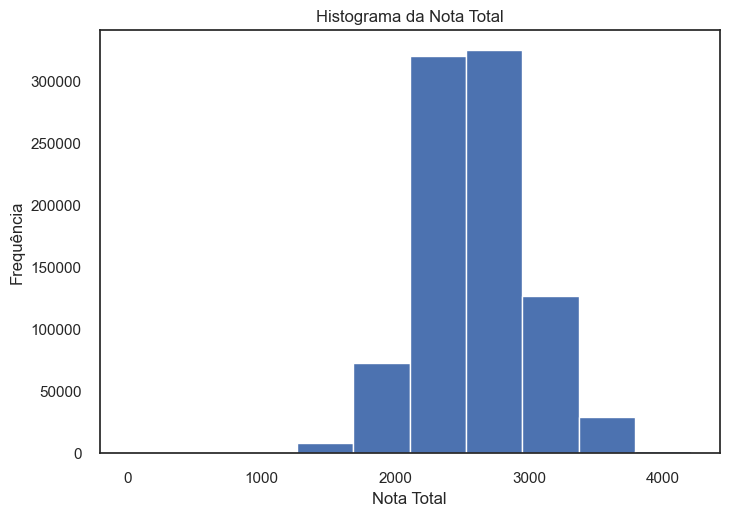

In [144]:
# solução: histograma

import matplotlib.pyplot as plt

# Supondo que você já tenha os dados de teste "test_y"
# Você pode usar o método "hist" do matplotlib para gerar o histograma
plt.hist(test_y, bins=10)  # Defina o número de bins desejado
plt.xlabel('Nota Total')
plt.ylabel('Frequência')
plt.title('Histograma da Nota Total')
plt.show()


## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [145]:
# solução

def top_p(serie, p = 0.75):
    # Calcule o quantil p
    quant = serie.quantile(p)
    print("Quantil encontrado:", quant)
    # Crie uma nova série de 1s e 0s com base no valor do quantil
    y = serie > quant
    return y.astype(int)


In [146]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

Quantil encontrado: 7.75


In [147]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

Quantil encontrado: 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [148]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

Quantil encontrado: 2839.8999999999996


0.24999011678012603

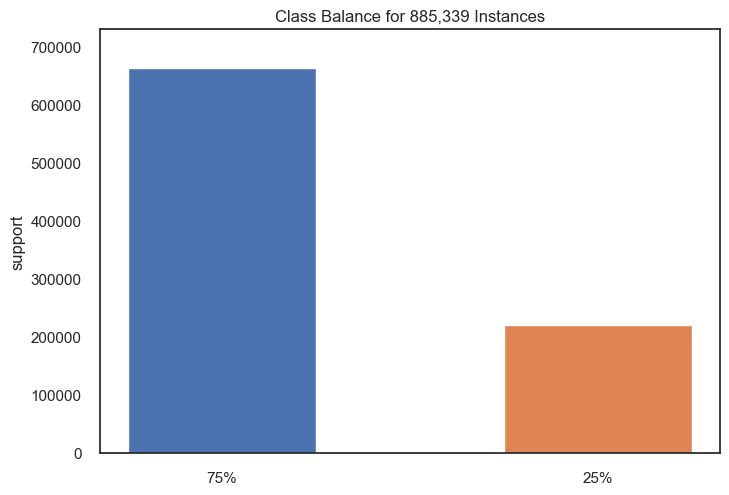

<Axes: title={'center': 'Class Balance for 885,339 Instances'}, ylabel='support'>

In [149]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

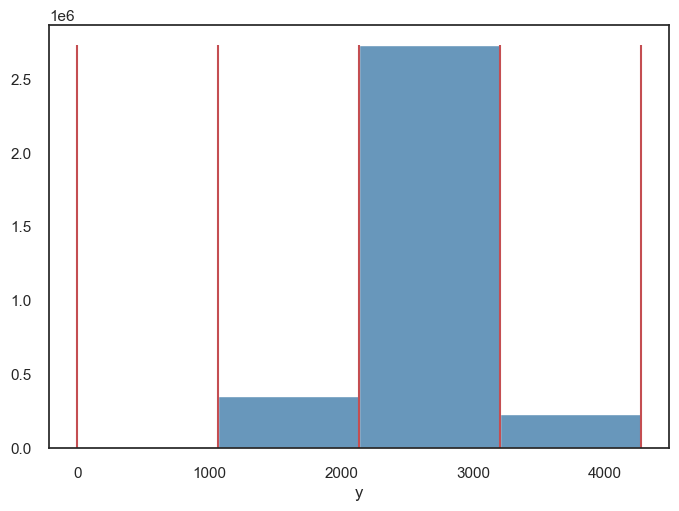

<Axes: xlabel='y'>

In [151]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(y_train)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [152]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [155]:
# solução

def gera_classificadores():
    # defina seus modelos

    modelo1 = LogisticRegression()
    modelo2 = DecisionTreeClassifier()
    modelo3 = RandomForestClassifier()
    modelo4 = DummyClassifier()
    modelo5 = RidgeClassifier()
    modelo6 = SVC()

    modelos = [modelo1, modelo2, modelo3, modelo4, modelo5, modelo6]

    return modelos

In [156]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [162]:
def split_classificacao(enem):
    np.random.seed(42)  # Definindo a semente para reprodução dos resultados
    
    # Definindo X como todas as colunas de `dados` exceto a coluna 'top_p'
    X = enem.drop('top_p', axis=1)
    
    # Definindo y como somente a coluna 'top_p'
    y = enem['top_p']
    
    # Quebrando em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [163]:
# código pronto: teste

interesse = enem[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

Quantil encontrado: 2839.5


C:\Users\Danilo Andrade\AppData\Local\Temp\ipykernel_12768\3814878616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse['nota_total'])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3541353, 3) (3541353,) (885339, 3) (885339,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.24993815928136


## Pergunta: implemente o treino e o teste do classificador

In [164]:
# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [201]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    #Selecionando somente as colunas especificadas de dados
    interesse = enem[colunas + ['nota_total']].copy() 
    # Selecionando somente a coluna nota_total
    nota_total = enem['nota_total']  
    top_p = nota_total.quantile(p)  # Calculando o quantil de p da coluna nota_total
    interesse['top_p'] = nota_total.apply(lambda x: 1 if x >= top_p else 0)  # Definindo quem está no top p

    #interesse = interesse.drop('nota_total', axis=1)  # Removendo a coluna 'nota_total' do DataFrame


    #interesse = enem[colunas + ['nota_total']].copy() # selecione somente as colunas especificas de dados
    #nota_total = dados['nota_total']  # Selecionando somente a coluna nota_total
    #interesse['top_p'] = interesse['nota_total'].apply(lambda x: 1 if x >= interesse['nota_total'].quantile(p) else 0) # defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (3541353, 3) (3541353,) (885339, 3) (885339,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500194840620373


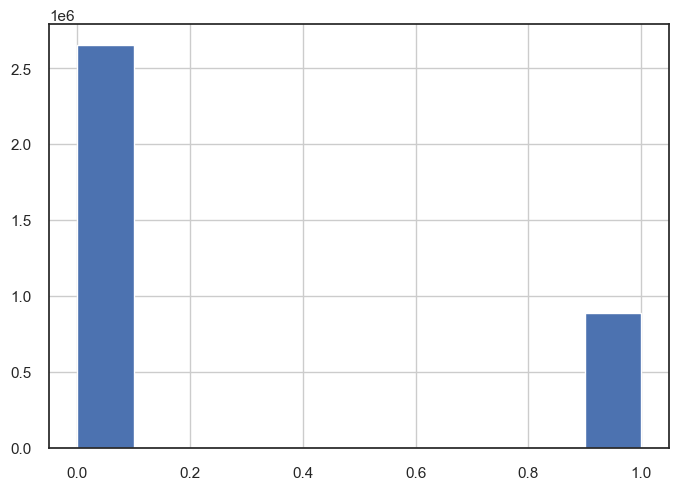

In [202]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [203]:
from sklearn.metrics import accuracy_score

def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # Calcule a accuracy_score
    y_pred = pipe.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    print("Resultado", nome, accuracy)
    return accuracy, tempo_de_treino


In [204]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def analisa_classificacao(dados, p):
    # Separando os dados em treino e teste
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados=dados, colunas=["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=p)

    resultados = []
    modelos = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        KNeighborsClassifier()
    ]

    for modelo in modelos:
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])

    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return resultados


In [188]:
# código pronto

"""def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")
"""

'def analisa_classificacao(dados, p = 0.75):\n    \n    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]\n    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)\n    \n    resultados = []\n    for modelo in gera_classificadores():\n        nome = type(modelo).__name__\n        pipe = make_pipeline(StandardScaler(), modelo)\n        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)\n        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])\n        \n    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])\n    return test_x, test_y, resultados.set_index("tipo")\n'

## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célula diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

In [ ]:
# Top 25% (p = 0.75)
train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados=enem, colunas=["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)
notas_top_25 = analisa_classificacao(enem, p = 0.75)


In [ ]:
# solução top 25%
# rode a analisa_classificacao e armazene test_x, test_y e notas
_, _, _, _, notas = analisa_classificacao(enem, p=0.75)
notas = pd.DataFrame(notas, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
notas[["accuracy_score", "tempo_de_treino"]]


In [ ]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
_, _, _, _, notas = analisa_classificacao(enem, p=0.8)
notas = pd.DataFrame(notas, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
notas[["accuracy_score", "tempo_de_treino"]]


In [ ]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
_, _, _, _, notas = analisa_classificacao(enem, p=0.9)
notas = pd.DataFrame(notas, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
notas[["accuracy_score", "tempo_de_treino"]]

In [ ]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
_, _, _, _, notas = analisa_classificacao(enem, p=0.95)
notas = pd.DataFrame(notas, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
notas[["accuracy_score", "tempo_de_treino"]]

In [ ]:
# solução top 1%

# rode a analisa_classificacao e armazene test_x, test_y e notas
_, _, _, _, notas = analisa_classificacao(enem, p=0.99)
notas = pd.DataFrame(notas, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
notas[["accuracy_score", "tempo_de_treino"]]


In [ ]:
# solução bottom 25%
# rode a analisa_classificacao e armazene test_x, test_y e notas
_, _, _, _, notas = analisa_classificacao(enem, p=0.25)
notas = pd.DataFrame(notas, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
notas[["accuracy_score", "tempo_de_treino"]]


## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta para os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

In [ ]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [227]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


In [218]:
"""import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel('Predições')
    ax.set_ylabel('Valores verdadeiros')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()

"""



'import matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.metrics import confusion_matrix\n\n# Função para plotar a matriz de confusão\ndef plot_confusion_matrix(y_true, y_pred, labels):\n    cm = confusion_matrix(y_true, y_pred, labels=labels)\n    ax = plt.subplot()\n    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False, ax=ax)\n    ax.set_xlabel(\'Predições\')\n    ax.set_ylabel(\'Valores verdadeiros\')\n    ax.set_xticklabels(labels)\n    ax.set_yticklabels(labels)\n    plt.show()\n\n'

In [226]:
# Fazer previsões com o modelo de Regressão Logística
#pred_lr = notas.loc['enem']['pipe'].predict(test_x)

# Plotar matriz de confusão para Regressão Logística
#plot_confusion_matrix(test_y, pred_lr, labels=['Aprovado', 'Reprovado'])



# código atualizado
print_confusion_for(test_x, test_y, enem.loc['LogisticRegression']['pipe'])


KeyError: 'LogisticRegression'

In [229]:
# Plotar matriz de confusão para SVC
#plot_confusion_matrix(test_y, pred_svc, labels=['Aprovado', 'Reprovado'])

# código pronto

print_confusion_for(test_x, test_y, enem.loc['SVC']['pipe'])

KeyError: 'SVC'

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [230]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382425 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [241]:
def separa_dados_de_classificacao_para_validacao(dados):
    # Selecionar as 3 colunas
    X = dados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']] # Substitua 'coluna1', 'coluna2' e 'coluna3' pelos nomes das colunas que você deseja selecionar

    # Calcular o top 25% como 1 e o bottom 75% como 0
    y = np.where(dados['nota_total'] >= np.percentile(dados['nota_total'], 75), 1, 0) # Substitua 'coluna_alvo' pelo nome da coluna alvo em seus dados

    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # Separe os dados em X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)

    # Rode um cross_val_score com o modelo, 5 folds de validação cruzada estratificada
    scores = cross_val_score(modelo, X, y, cv=5, verbose=1, n_jobs=-1)

    # Imprima a acurácia encontrada na validação cruzada
    print("Acurácia encontrada na validação cruzada: %.2f%%" % (100 * scores.mean()))

    # Faça o treinamento do modelo
    modelo.fit(X, y)

    # Imprima a matriz de confusão do modelo para X e y
    y_pred = modelo.predict(X)
    conf_mat = confusion_matrix(y, y_pred)
    print("Matriz de Confusão:")
    print(conf_mat)


In [243]:
from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # Calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)

    # Calcule o cross_val_score
    scores = cross_val_score(modelo, X, y, cv=5) # Substitua o valor "cv" pelo número de folds desejado para a validação cruzada

    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))

    modelo.fit(X, y)
    print_confusion_for(X, y, modelo) # Substitua essa função pelo código apropriado para imprimir a matriz de confusão do seu modelo


Média da validação 0.25001942759966134
Acurácia entre [90.93,90.94]
Acurácia do modelo em teste 0.9094185906767401


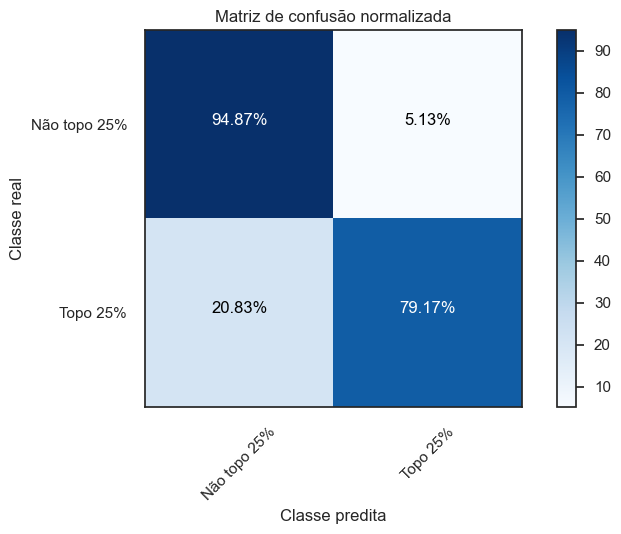

In [244]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem, pipeline_logistica)

In [240]:
print(enem.columns)


Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total'],
      dtype='object')


## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [250]:
"""from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis=0)  # some por coluna. A função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis=0)  # some por coluna
        y_pred_true_false = parcial >= self.top_25_quantile  # compare a soma parcial com o self.top25_quantile
        y_pred = y_pred_true_false.astype(int)  # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}
"""

'from sklearn.metrics import accuracy_score\n\nclass HeuristicaTop25:\n\n    def fit(self, X, y = None):\n        if(X.shape[1] != 3):\n            print("Erro!!! Estávamos esperando 3 colunas!")\n            \n        parcial = X.sum(axis=0)  # some por coluna. A função sum recebe um parâmetro para somar por coluna, não linha\n        self.top_25_quantile = pd.Series(parcial).quantile(0.75)\n        print("top 25 quantile é %.2f" % self.top_25_quantile)\n        return self\n\n    def predict(self, X, y = None):\n        parcial = X.sum(axis=0)  # some por coluna\n        y_pred_true_false = parcial >= self.top_25_quantile  # compare a soma parcial com o self.top25_quantile\n        y_pred = y_pred_true_false.astype(int)  # 1 se for maior ou igual, 0 caso contrário\n        return y_pred\n\n    def score(self, X, y = None):\n        return accuracy_score(y, self.predict(X, y))\n\n    def get_params(self, deep=True):\n        return {}\n'

In [ ]:
"""# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = # some por coluna
        y_pred_true_false = # compare a soma parcial com o self.top25_quantile
        y_pred = # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}"""

In [251]:
from sklearn.base import BaseEstimator
import numpy as np

class EstimadorTop25(BaseEstimator):
    def __init__(self):
        self.quantil_top25 = None

    def fit(self, X, y=None):
        """
        Calcula o quantil de top 25% com base na soma das colunas em X.
        """
        soma_colunas = np.sum(X, axis=1)
        self.quantil_top25 = np.percentile(soma_colunas, 75)
        return self

    def predict(self, X, y=None):
        """
        Classifica os alunos em top 25% (1) ou não (0) com base na nota de corte calculada no fit().
        """
        soma_colunas = np.sum(X, axis=1)
        predicoes = np.where(soma_colunas > self.quantil_top25, 1, 0)
        return predicoes

    def score(self, X, y=None):
        """
        Calcula a acurácia das predições com base nas respostas corretas y.
        """
        predicoes = self.predict(X)
        acuracia = np.mean(predicoes == y)
        return acuracia

    def get_params(self, deep=True):
        """
        Retorna os parâmetros do estimador. Não possui parâmetros a serem otimizados.
        """
        return {}


Média da validação 0.25001942759966134
Acurácia entre [90.85,90.88]
Acurácia do modelo em teste 0.9083534612301918


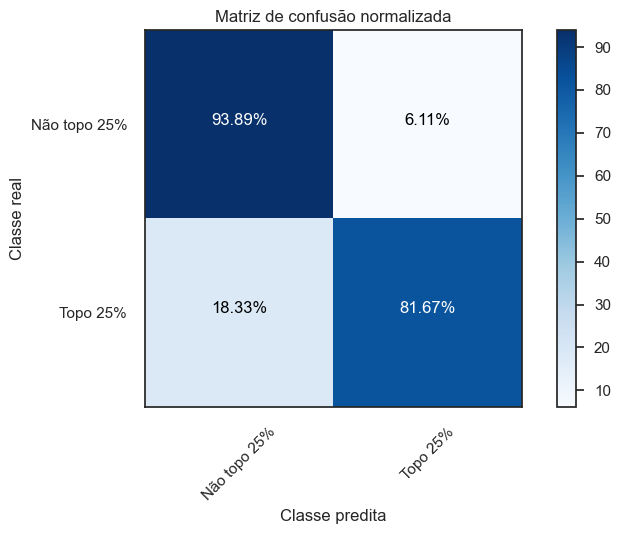

In [252]:

treina_e_valida_modelo_de_classificacao(enem, EstimadorTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

    Sua solução aqui

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o estimador heurístico
estimador_heuristico = EstimadorTop25()
estimador_heuristico.fit(X_train, y_train)

# Realizar predições com o estimador heurístico
predicoes_heuristico = estimador_heuristico.predict(X_test)

# Calcular acurácia do estimador heurístico
acuracia_heuristico = accuracy_score(y_test, predicoes_heuristico)

# Calcular matriz de confusão do estimador heurístico
matriz_confusao_heuristico = confusion_matrix(y_test, predicoes_heuristico)

# Instanciar e treinar o DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Realizar predições com o DummyClassifier
predicoes_dummy = dummy.predict(X_test)

# Calcular acurácia do DummyClassifier
acuracia_dummy = accuracy_score(y_test, predicoes_dummy)

# Calcular matriz de confusão do DummyClassifier
matriz_confusao_dummy = confusion_matrix(y_test, predicoes_dummy)

# Instanciar e treinar a LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Realizar predições com a LogisticRegression
predicoes_logreg = logreg.predict(X_test)

# Calcular acurácia da LogisticRegression
acuracia_logreg = accuracy_score(y_test, predicoes_logreg)

# Calcular matriz de confusão da LogisticRegression
matriz_confusao_logreg = confusion_matrix(y_test, predicoes_logreg)

# Comparar os resultados obtidos
print("Acurácia do estimador heurístico: {:.2f}".format(acuracia_heuristico))
print("Matriz de confusão do estimador heurístico:\n", matriz_confusao_heuristico)
print("\nAcurácia do DummyClassifier: {:.2f}".format(acuracia_dummy))
print("Matriz de confusão do DummyClassifier:\n", matriz_confusao_dummy)
print("\nAcurácia da LogisticRegression: {:.2f}".format(acuracia_logreg))
print("Matriz de confusão da LogisticRegression:\n", matriz_confusao_logreg)

NameError: name 'X' is not defined

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Sua solução aqui

In [255]:
class HeuristicaMedia:
    def __init__(self):
        self.media = None
        
    def fit(self, X, y):
        self.media = X.mean(axis=0)
        
    def predict(self, X):
        notas_soma = X.sum(axis=1)
        notas_acima_media = notas_soma > self.media.sum()
        return notas_acima_media.astype(int)


## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    Sua solução aqui

Se o modelo errar ao julgar que alguém está no seleto grupo dos melhores, tal pessoa pode ser agraciada com a tão sonhada bolsa, mesmo que, na realidade, não possua o desempenho condizente com tal distinção. Uma concessão injusta, que pode direcionar recursos a estudantes que não atendem aos critérios de seleção, negligenciando aqueles mais merecedores.

Nesse sentido, é imperativo lembrar que modelos de aprendizado de máquina não são infalíveis e que é crucial avaliar e monitorar constantemente seu desempenho, a fim de assegurar previsões corretas e justas. Combinar o uso de modelos com outras informações e critérios, bem como a aplicação de heurísticas e regras de negócio adicionais, é uma prática recomendada para evitar decisões injustas baseadas unicamente nas previsões do modelo. Afinal, a justiça e a equidade devem sempre guiar as escolhas que moldam o futuro dos estudantes e suas oportunidades de acesso à educação.

Outrossim:

In [ ]:
# Função para aplicar a regra de negócio e ajustar as previsões do modelo
def aplicar_regra_negocio(y_pred, X, quantile):
    # Calcula a soma das colunas em X
    soma_colunas = X.sum(axis=1)
    # Obtém a nota de corte para o top 25%
    nota_corte = soma_colunas.quantile(quantile)
    # Aplica a regra de negócio
    y_pred_corrigido = y_pred.copy()
    y_pred_corrigido[soma_colunas < nota_corte] = 0
    return y_pred_corrigido

# Aplica a regra de negócio às previsões do modelo
y_pred_corrigido = aplicar_regra_negocio(y_pred, X, 0.75)


Dessa forma, é possível aplicar uma regra de negócio adicional para corrigir as previsões do modelo e evitar concessões incorretas de bolsas com base em classificações errôneas. É importante ajustar os parâmetros, como o quantil, de acordo com o contexto específico do problema e o desempenho do modelo.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto !